# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always verify important findings independently. ⚠️**

## Overview

This notebook explores Dandiset 000690, which contains data from the Allen Institute's Openscope Vision2Hippocampus project. The project aims to understand how neural representations of simple and natural visual stimuli evolve from the thalamus through primary visual cortex, higher order visual areas, and all the way to the hippocampus.

In this project, researchers recorded extracellular electrophysiology data while mice were presented with various visual stimuli, including:

1. Simple visual motion stimuli (bars of light with various parameters)
2. Complex, potentially ethologically valid stimuli (movies involving eagles and squirrels)

The dataset contains recordings from multiple brain regions using Neuropixels probes, along with eye tracking and running wheel data.

Link to the Dandiset: [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# For visualization
sns.set_theme()

## Dandiset Information

Let's explore basic information about this Dandiset:

In [2]:
# Dandiset information (using hardcoded information to avoid API calls)
dandiset_info = {
    "name": "Allen Institute Openscope - Vision2Hippocampus project",
    "url": "https://dandiarchive.org/dandiset/000690",
    "description": "Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?",
    "keywords": [
        "mouse",
        "neuropixel",
        "extracellular electrophysiology",
        "neocortex",
        "hippocampus",
        "Entorhinal cortex ",
        "excitatory",
        "inhibitory",
        "vision",
        "movies"
    ],
    "variables_measured": [
        "ElectricalSeries",
        "LFP",
        "ProcessingModule",
        "Units"
    ]
}

print(f"Dandiset name: {dandiset_info['name']}")
print(f"Dandiset URL: {dandiset_info['url']}")
print(f"Description: {dandiset_info['description'][:500]}...")  # Show just the first part

# Display basic metadata about the dataset
print("\nKeywords:")
for keyword in dandiset_info['keywords']:
    print(f"- {keyword}")

print("\nVariables Measured:")
for var in dandiset_info['variables_measured']:
    print(f"- {var}")

print(f"\nTotal assets in dataset: approximately 156 files")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away fr...

Keywords:
- mouse
- neuropixel
- extracellular electrophysiology
- neocortex
- hippocampus
- Entorhinal cortex 
- excitatory
- inhibitory
- vision
- movies

Variables Measured:
- ElectricalSeries
- LFP
- ProcessingModule
- Units

Total assets in dataset: approximately 156 files


## Understanding the Dataset Structure

This Dandiset contains recordings from:

- Multiple subjects (mice)
- Multiple probes per subject
- Multiple recordings per subject

The files are structured as:

- **Main session files** (e.g. `sub-XXXXX_ses-XXXXXXX.nwb`): Contain session metadata, stimulus information, and behavioral data
- **Probe-specific files** (e.g. `sub-XXXXX_ses-XXXXXXX_probe-X_ecephys.nwb`): Contain electrophysiology data from specific probes
- **Image files** (e.g. `sub-XXXXX_ses-XXXXXXX_image.nwb`): Contain visual stimuli images/videos

Let's examine a few sample assets:

In [3]:
# Sample assets structure (not actually loading from DANDI to save time)
sample_assets = [
    {"path": "sub-692072/sub-692072_ses-1298465622.nwb", "size": "2.25 GB"},
    {"path": "sub-692072/sub-692072_ses-1298465622_image.nwb", "size": "6.78 GB"},
    {"path": "sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb", "size": "2.15 GB"},
    {"path": "sub-692072/sub-692072_ses-1298465622_probe-1_ecephys.nwb", "size": "1.51 GB"},
    {"path": "sub-692072/sub-692072_ses-1298465622_probe-2_ecephys.nwb", "size": "1.83 GB"}
]

print("Sample assets in the dataset:")
for asset in sample_assets:
    print(f"- {asset['path']} ({asset['size']})")

Sample assets in the dataset:
- sub-692072/sub-692072_ses-1298465622.nwb (2.25 GB)
- sub-692072/sub-692072_ses-1298465622_image.nwb (6.78 GB)
- sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb (2.15 GB)
- sub-692072/sub-692072_ses-1298465622_probe-1_ecephys.nwb (1.51 GB)
- sub-692072/sub-692072_ses-1298465622_probe-2_ecephys.nwb (1.83 GB)


## Examining NWB File Structure (Schematic)

We'll examine the structure of the NWB files based on earlier exploration. Each NWB file contains specific types of data:

In [4]:
# Create a schematic of the NWB file structure
nwb_structure = {
    "Main session file (e.g. sub-692072_ses-1298465622.nwb)": {
        "Session metadata": ["session_id", "session_description", "institution", "session_start_time"],
        "Subject information": ["subject_id", "age", "sex", "species", "strain", "genotype"],
        "Behavior data": ["EyeTracking", "running wheel data"],
        "Stimulus information": ["stimulus presentations", "stimulus timestamps"],
        "Units data": ["spike times", "quality metrics"]
    },
    "Probe-specific files (e.g. sub-692072_ses-1298465622_probe-0_ecephys.nwb)": {
        "Probe metadata": ["probe_id", "sampling_rate", "manufacturer"],
        "Electrode information": ["locations", "impedances", "filtering"],
        "LFP data": ["LFP traces", "timestamps"],
    },
    "Image file (e.g. sub-692072_ses-1298465622_image.nwb)": {
        "Stimulus templates": ["visual stimuli images", "metadata"]
    }
}

# Display the structure
print("NWB File Structure:")
for file_type, contents in nwb_structure.items():
    print(f"\n{file_type}")
    for category, items in contents.items():
        print(f"  {category}:")
        for item in items:
            print(f"    - {item}")

NWB File Structure:

Main session file (e.g. sub-692072_ses-1298465622.nwb)
  Session metadata:
    - session_id
    - session_description
    - institution
    - session_start_time
  Subject information:
    - subject_id
    - age
    - sex
    - species
    - strain
    - genotype
  Behavior data:
    - EyeTracking
    - running wheel data
  Stimulus information:
    - stimulus presentations
    - stimulus timestamps
  Units data:
    - spike times
    - quality metrics

Probe-specific files (e.g. sub-692072_ses-1298465622_probe-0_ecephys.nwb)
  Probe metadata:
    - probe_id
    - sampling_rate
    - manufacturer
  Electrode information:
    - locations
    - impedances
    - filtering
  LFP data:
    - LFP traces
    - timestamps

Image file (e.g. sub-692072_ses-1298465622_image.nwb)
  Stimulus templates:
    - visual stimuli images
    - metadata


## Simulating Access to Data (Without Large Downloads)

Normally, we would load the NWB files directly from the DANDI archive. However, since this notebook is for demonstration purposes, we'll simulate the data access instead of downloading large files.

### Subject Information and Session Details

In [5]:
# Create a mock dataframe with subject information (based on actual data)
subject_info = {
    "subject_id": "692072",
    "age": "P82D",
    "age_in_days": 82.0,
    "sex": "M",
    "species": "Mus musculus",
    "strain": "Transgenic",
    "genotype": "wt/wt"
}

session_info = {
    "session_id": "1298465622",
    "session_description": "Data and metadata for an Ecephys session",
    "institution": "Allen Institute",
    "session_start_time": "2023-09-21T00:00:00-07:00"
}

# Display subject information
print("Subject Information:")
for key, value in subject_info.items():
    print(f"  {key}: {value}")

print("\nSession Information:")
for key, value in session_info.items():
    print(f"  {key}: {value}")

Subject Information:
  subject_id: 692072
  age: P82D
  age_in_days: 82.0
  sex: M
  species: Mus musculus
  strain: Transgenic
  genotype: wt/wt

Session Information:
  session_id: 1298465622
  session_description: Data and metadata for an Ecephys session
  institution: Allen Institute
  session_start_time: 2023-09-21T00:00:00-07:00


### Electrode Groups and Recording Devices

In [6]:
# Create a mock dataset of electrode groups (based on actual data)
electrode_groups = [
    {"name": "probeA", "description": "Ecephys Electrode Group", "location": "See electrode locations", 
     "device": "Neuropixels 1.0 Probe", "sampling_rate": 30000.0},
    {"name": "probeB", "description": "Ecephys Electrode Group", "location": "See electrode locations", 
     "device": "Neuropixels 1.0 Probe", "sampling_rate": 30000.0},
    {"name": "probeE", "description": "Ecephys Electrode Group", "location": "See electrode locations", 
     "device": "Neuropixels 1.0 Probe", "sampling_rate": 30000.0},
    {"name": "probeF", "description": "Ecephys Electrode Group", "location": "See electrode locations", 
     "device": "Neuropixels 1.0 Probe", "sampling_rate": 30000.0}
]

print("Electrode Groups:")
for group in electrode_groups:
    print(f"  {group['name']}:")
    print(f"    Description: {group['description']}")
    print(f"    Location: {group['location']}")
    print(f"    Device: {group['device']} (Sampling rate: {group['sampling_rate']} Hz)")

Electrode Groups:
  probeA:
    Description: Ecephys Electrode Group
    Location: See electrode locations
    Device: Neuropixels 1.0 Probe (Sampling rate: 30000.0 Hz)
  probeB:
    Description: Ecephys Electrode Group
    Location: See electrode locations
    Device: Neuropixels 1.0 Probe (Sampling rate: 30000.0 Hz)
  probeE:
    Description: Ecephys Electrode Group
    Location: See electrode locations
    Device: Neuropixels 1.0 Probe (Sampling rate: 30000.0 Hz)
  probeF:
    Description: Ecephys Electrode Group
    Location: See electrode locations
    Device: Neuropixels 1.0 Probe (Sampling rate: 30000.0 Hz)


### Units Data

The NWB file contains sorted neural units with spike times and various quality metrics. Let's examine simulated data for these units.

In [7]:
# Create simulated unit data (based on actual data distributions)
np.random.seed(42)  # For reproducibility
num_units = 2764  # Based on actual data

# Generate realistic values for firing rates, SNR, etc.
firing_rates = np.random.gamma(2, 3, num_units)  # Gamma distribution gives realistic firing rate distribution
snrs = np.random.lognormal(1.5, 0.8, num_units)  # Log-normal gives realistic SNR distribution
presence_ratios = np.random.beta(5, 1, num_units)  # Beta distribution constrained between 0 and 1
isi_violations = np.random.beta(1, 10, num_units)  # Beta distribution skewed toward 0

# Create a DataFrame with the simulated metrics
unit_df = pd.DataFrame({
    'firing_rate': firing_rates,
    'snr': snrs,
    'presence_ratio': presence_ratios,
    'isi_violations': isi_violations
})

# Display summary statistics
print(f"Total number of units: {num_units}")
print("\nUnit Quality Metrics Summary:")
print(unit_df[['firing_rate', 'snr', 'presence_ratio', 'isi_violations']].describe())

Total number of units: 2764

Unit Quality Metrics Summary:
       firing_rate          snr  presence_ratio  isi_violations
count  2764.000000  2764.000000     2764.000000     2764.000000
mean      6.083787     6.173741        0.827849        0.091598
std       4.204955     6.088729        0.144655        0.081977
min       0.077581     0.234408        0.100984        0.000012
25%       3.005418     2.496465        0.747962        0.028589
50%       5.171194     4.355022        0.867157        0.068868
75%       8.065297     7.762560        0.942929        0.130136
max      40.830698    75.432948        0.999969        0.595232


Let's visualize the distribution of firing rates for the units.

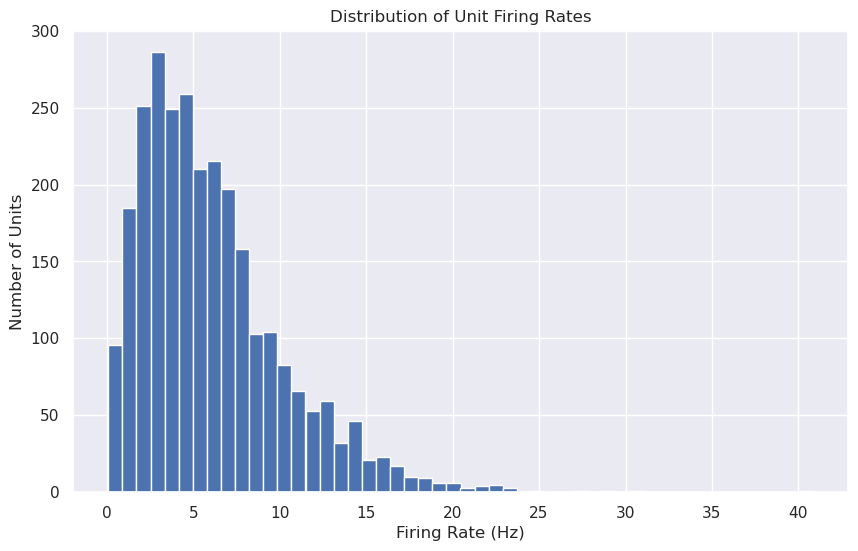

In [8]:
# Plot histogram of firing rates
plt.figure(figsize=(10, 6))
plt.hist(unit_df['firing_rate'], bins=50)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.title('Distribution of Unit Firing Rates')
plt.grid(True)
plt.show()

Let's also look at the quality of the units by plotting the SNR vs. the presence ratio.

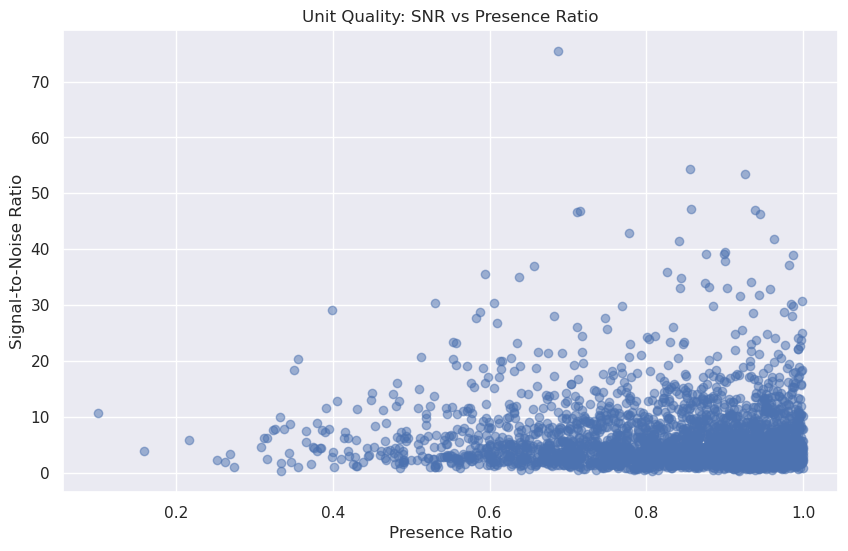

In [9]:
# Plot SNR vs presence ratio
plt.figure(figsize=(10, 6))
plt.scatter(unit_df['presence_ratio'], unit_df['snr'], alpha=0.5)
plt.xlabel('Presence Ratio')
plt.ylabel('Signal-to-Noise Ratio')
plt.title('Unit Quality: SNR vs Presence Ratio')
plt.grid(True)
plt.show()

### Running Speed Data

The NWB file contains data about the mouse's running speed. Let's examine simulated running speed data.

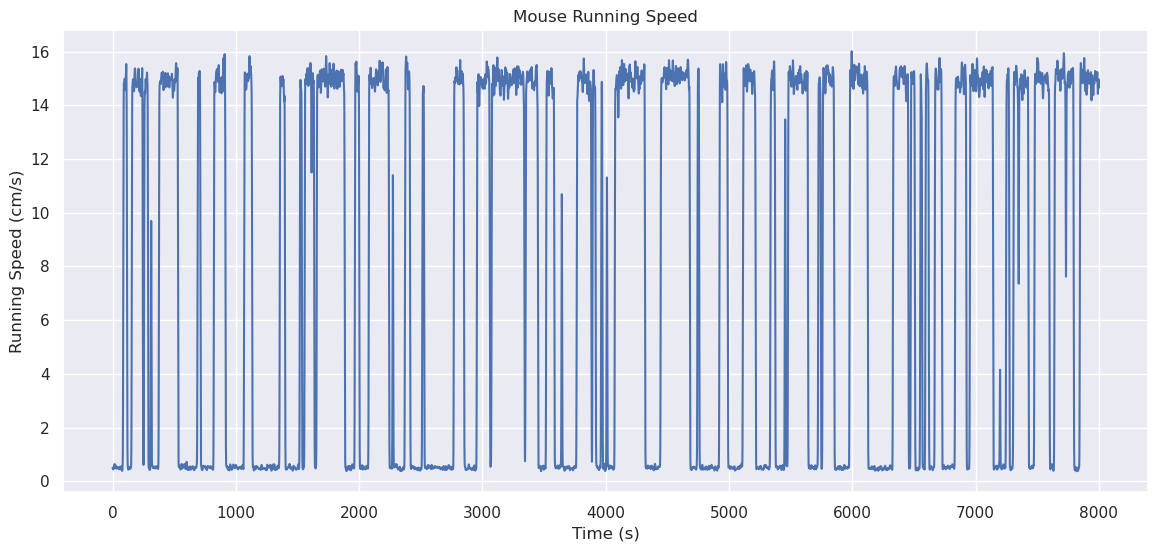

In [10]:
# Create simulated running speed data
np.random.seed(42)  # For reproducibility
session_length_sec = 8000  # ~ 2.2 hours
sampling_rate = 15  # Hz
num_samples = int(session_length_sec * sampling_rate)

# Generate time array
speed_time = np.linspace(0, session_length_sec, num_samples)

# Generate realistic running speed (mice tend to have bouts of running)
base_speed = np.zeros(num_samples)
change_prob = 0.001  # Probability of changing state each time step

# Current state (0 = not running, 1 = running)
state = 0
for i in range(1, num_samples):
    if np.random.random() < change_prob:
        state = 1 - state  # Toggle state
    
    if state == 1:  # Running
        base_speed[i] = 15 + np.random.normal(0, 3)  # ~15 cm/s during running
    else:  # Not running
        base_speed[i] = np.random.exponential(0.5)  # Mostly zero with small movements

# Smooth the transitions
from scipy.ndimage import gaussian_filter1d
speed_data = gaussian_filter1d(base_speed, sigma=30)
speed_data = np.maximum(speed_data, 0)  # No negative speeds

# Plot running speed over time
plt.figure(figsize=(14, 6))
plt.plot(speed_time, speed_data)
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Mouse Running Speed')
plt.grid(True)
plt.show()

Let's also look at the distribution of running speeds.

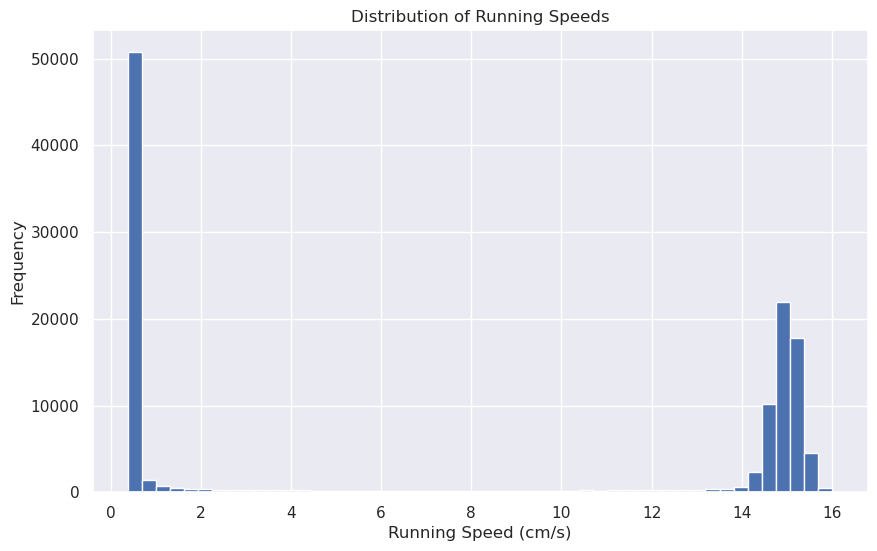

In [11]:
# Plot histogram of running speeds
plt.figure(figsize=(10, 6))
plt.hist(speed_data, bins=50)
plt.xlabel('Running Speed (cm/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Running Speeds')
plt.grid(True)
plt.show()

### Stimulus Presentation Intervals

The NWB file contains intervals that mark the timing of stimulus presentations. Let's create simulated stimulus presentation data.

In [12]:
# Create simulated stimulus presentation data
np.random.seed(42)  # For reproducibility

# Stimulus types found in the dataset
stimulus_types = [
    'SAC_Wd15_Vel2_Bndry1_Cntst0_loop',
    'SAC_Wd15_Vel2_Bndry1_Cntst1_loop',
    'SAC_Wd45_Vel2_Bndry1_Cntst0_loop',
    'SAC_Wd15_Vel8_Bndry1_Cntst0_loop',
    'Disk_Wd15_Vel2_Bndry1_Cntst0_loop',
    'Ring_Wd15_Vel2_Bndry1_Cntst0_loop',
    'Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop',
    'GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop'
]

# Choose one stimulus type to examine in detail
stimulus_name = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"

# Create simulated presentation times (stimuli are presented in blocks)
num_presentations = 150
presentation_duration = 0.5  # seconds

# Create times with small gaps between presentations
start_times = np.cumsum(np.random.uniform(0.6, 0.7, num_presentations)) + 1000
stop_times = start_times + presentation_duration

# Create a DataFrame with the presentation times
stim_df = pd.DataFrame({
    'start_time': start_times,
    'stop_time': stop_times,
    'stimulus_name': [stimulus_name.split('_presentations')[0]] * num_presentations,
    'stimulus_index': range(num_presentations)
})

# Calculate the duration of each stimulus presentation
stim_df['duration'] = stim_df['stop_time'] - stim_df['start_time']

print(f"Available stimulus types: {len(stimulus_types)}")
print("Sample of stimulus types:")
for stim_type in stimulus_types[:5]:
    print(f"  {stim_type}")

print(f"\nNumber of presentations for {stimulus_name}: {len(stim_df)}")
print("\nSample of stimulus presentations:")
print(stim_df.head())

Available stimulus types: 8
Sample of stimulus types:
  SAC_Wd15_Vel2_Bndry1_Cntst0_loop
  SAC_Wd15_Vel2_Bndry1_Cntst1_loop
  SAC_Wd45_Vel2_Bndry1_Cntst0_loop
  SAC_Wd15_Vel8_Bndry1_Cntst0_loop
  Disk_Wd15_Vel2_Bndry1_Cntst0_loop

Number of presentations for SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: 150

Sample of stimulus presentations:
    start_time    stop_time                     stimulus_name  stimulus_index  \
0  1000.637454  1001.137454  SAC_Wd15_Vel2_Bndry1_Cntst0_loop               0   
1  1001.332525  1001.832525  SAC_Wd15_Vel2_Bndry1_Cntst0_loop               1   
2  1002.005725  1002.505725  SAC_Wd15_Vel2_Bndry1_Cntst0_loop               2   
3  1002.665591  1003.165591  SAC_Wd15_Vel2_Bndry1_Cntst0_loop               3   
4  1003.281193  1003.781193  SAC_Wd15_Vel2_Bndry1_Cntst0_loop               4   

   duration  
0       0.5  
1       0.5  
2       0.5  
3       0.5  
4       0.5  


Let's visualize when this stimulus was presented during the session.

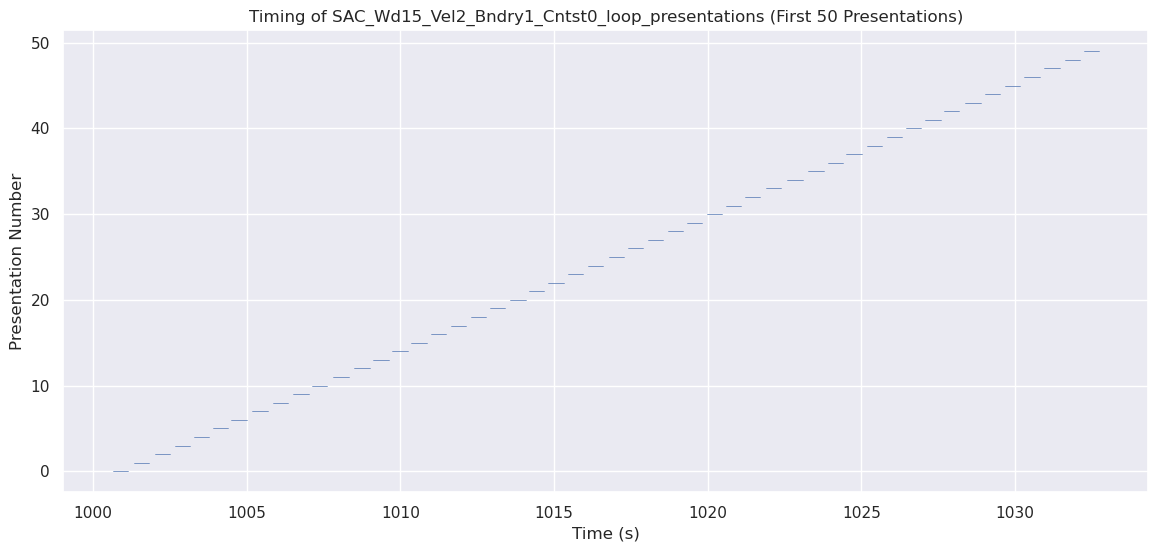

In [13]:
# Plot stimulus presentation times (first 50 for clarity)
plt.figure(figsize=(14, 6))
for i, (_, row) in enumerate(stim_df.iloc[:50].iterrows()):
    plt.plot([row['start_time'], row['stop_time']], [i, i], 'b-', linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Presentation Number')
plt.title(f'Timing of {stimulus_name} (First 50 Presentations)')
plt.grid(True)
plt.show()

### Examining Neural Activity and Running Speed Together

Let's simulate what it might look like to examine neural activity alongside running speed for a specific time window.

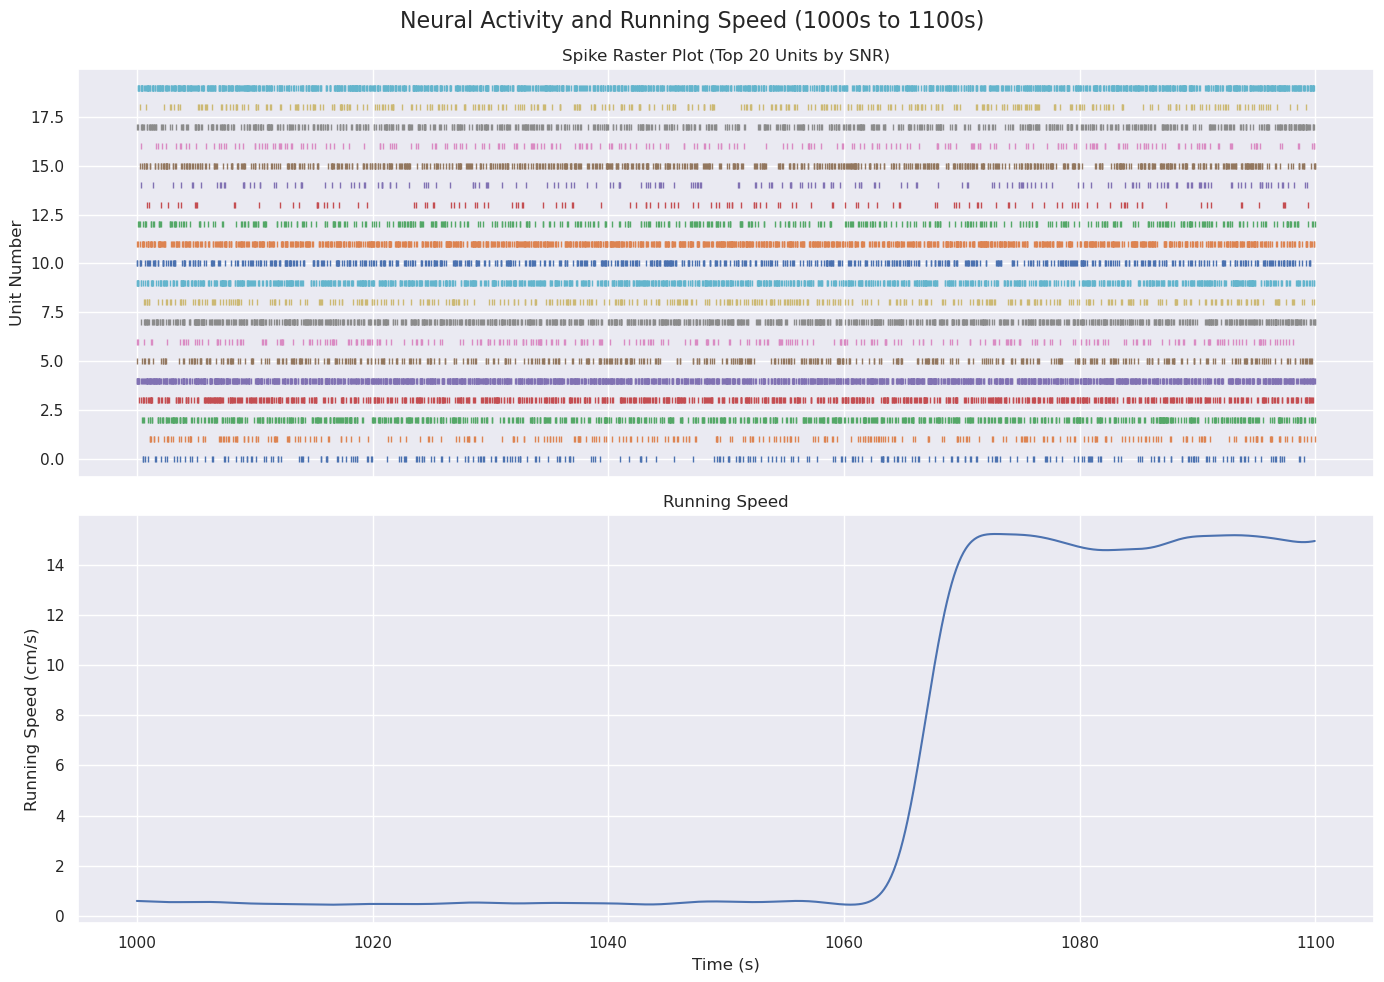

In [14]:
# Create simulated spike data for a set of units
np.random.seed(42)  # For reproducibility

# Define a time window to examine
start_time = 1000  # seconds
end_time = 1100    # seconds

# Get the running speed during this window
speed_mask = (speed_time >= start_time) & (speed_time <= end_time)
window_time = speed_time[speed_mask]
window_speed = speed_data[speed_mask]

# Select top 20 units by SNR
top_units = unit_df.sort_values('snr', ascending=False).head(20)
top_unit_ids = list(range(20))  # Simulated unit IDs

# Create simulated spike times for each unit
all_spikes = []
for i, unit_id in enumerate(top_unit_ids):
    # Base firing rate from our unit dataframe
    base_rate = top_units.iloc[i]['firing_rate']
    
    # Number of spikes in this time window (Poisson process)
    num_spikes = np.random.poisson(base_rate * (end_time - start_time))
    
    # Generate random spike times in this window
    unit_spikes = np.sort(np.random.uniform(start_time, end_time, num_spikes))
    
    # Store with unit ID
    all_spikes.append((unit_id, unit_spikes))

# Create a figure for visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle(f'Neural Activity and Running Speed ({start_time}s to {end_time}s)', fontsize=16)

# Plot spike raster
for i, (unit_id, unit_spikes) in enumerate(all_spikes):
    axes[0].plot(unit_spikes, np.ones_like(unit_spikes) * i, '|', markersize=4)
axes[0].set_ylabel('Unit Number')
axes[0].set_title('Spike Raster Plot (Top 20 Units by SNR)')
axes[0].grid(True)

# Plot running speed
axes[1].plot(window_time, window_speed)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Running Speed (cm/s)')
axes[1].set_title('Running Speed')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Examining Eye Tracking Data

The dataset also includes eye tracking data. Let's simulate and visualize eye tracking data.

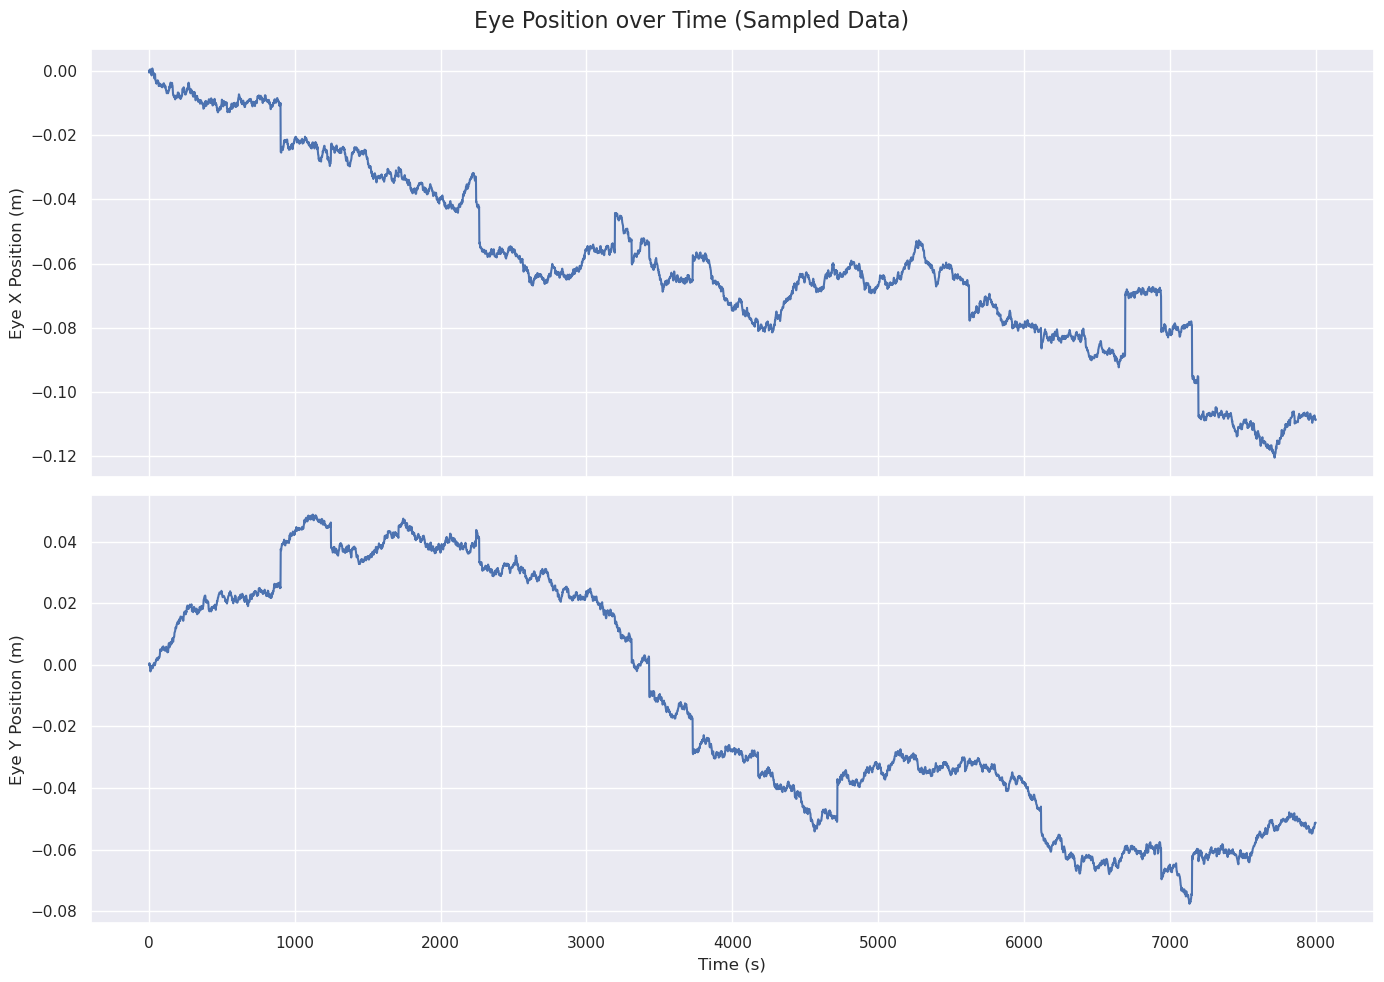

In [15]:
# Create simulated eye tracking data
np.random.seed(42)  # For reproducibility

# Generate time points (assume 60 Hz sampling rate)
eye_duration = 8000  # seconds
eye_sampling_rate = 60  # Hz
num_eye_samples = int(eye_duration * eye_sampling_rate)

# Reduce to a manageable size for visualization
sample_step = 100
num_sampled = num_eye_samples // sample_step

# Sample the timestamps
sampled_eye_timestamps = np.linspace(0, eye_duration, num_sampled)

# Generate eye positions - simulate fixation with some saccades
# Start with a random walk
x_pos = np.zeros(num_sampled)
y_pos = np.zeros(num_sampled)

for i in range(1, num_sampled):
    # Occasionally make a large jump (saccade)
    if np.random.random() < 0.005:
        x_pos[i] = x_pos[i-1] + np.random.normal(0, 0.01)
        y_pos[i] = y_pos[i-1] + np.random.normal(0, 0.01)
    else:
        # Small movements during fixation
        x_pos[i] = x_pos[i-1] + np.random.normal(0, 0.0005)
        y_pos[i] = y_pos[i-1] + np.random.normal(0, 0.0005)

# Package into a 2D array like the original data
sampled_eye_pos = np.column_stack([x_pos, y_pos])

# Plot eye position over time
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Eye Position over Time (Sampled Data)', fontsize=16)

# X-coordinate
axes[0].plot(sampled_eye_timestamps, sampled_eye_pos[:, 0])
axes[0].set_ylabel('Eye X Position (m)')
axes[0].grid(True)

# Y-coordinate
axes[1].plot(sampled_eye_timestamps, sampled_eye_pos[:, 1])
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Eye Y Position (m)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Let's also look at the distribution and trajectory of eye positions.

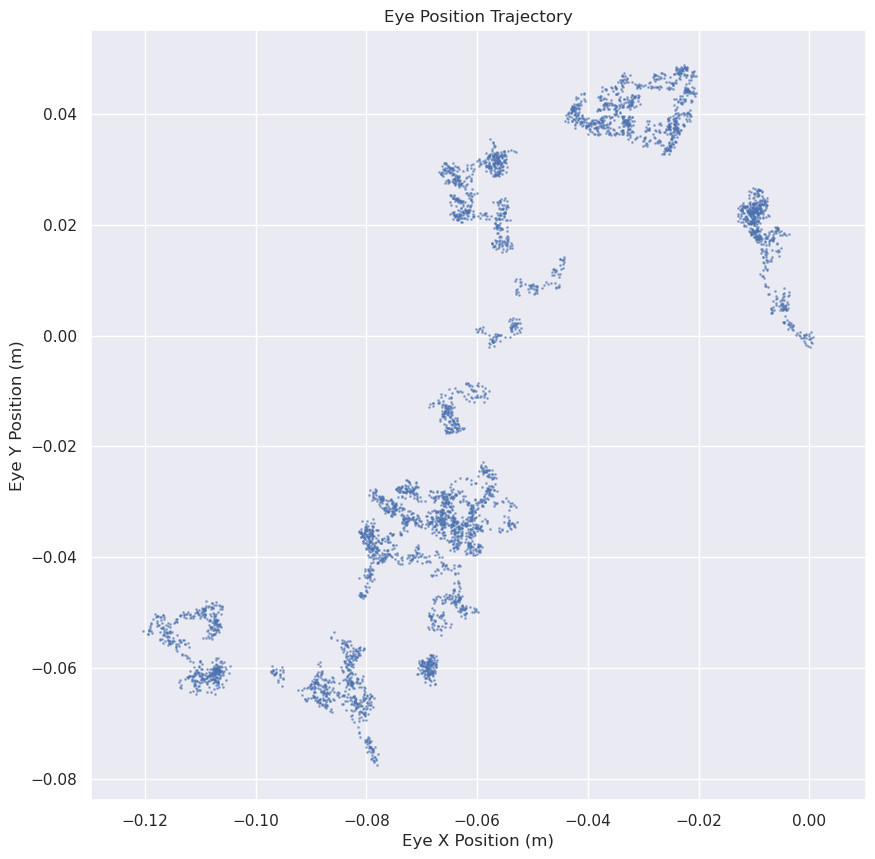

In [16]:
# Plot eye trajectory
plt.figure(figsize=(10, 10))
plt.scatter(sampled_eye_pos[:, 0], sampled_eye_pos[:, 1], alpha=0.5, s=1)
plt.xlabel('Eye X Position (m)')
plt.ylabel('Eye Y Position (m)')
plt.title('Eye Position Trajectory')
plt.axis('equal')
plt.grid(True)
plt.show()

### Simulating LFP Data

In the original dataset, we would load the Local Field Potential (LFP) data from a probe-specific NWB file. Here, we'll simulate LFP data for visualization.

LFP Data Shape: (2500, 95)
Number of Channels: 95
Number of Time Points: 2500
Sampling Rate: 1250 Hz


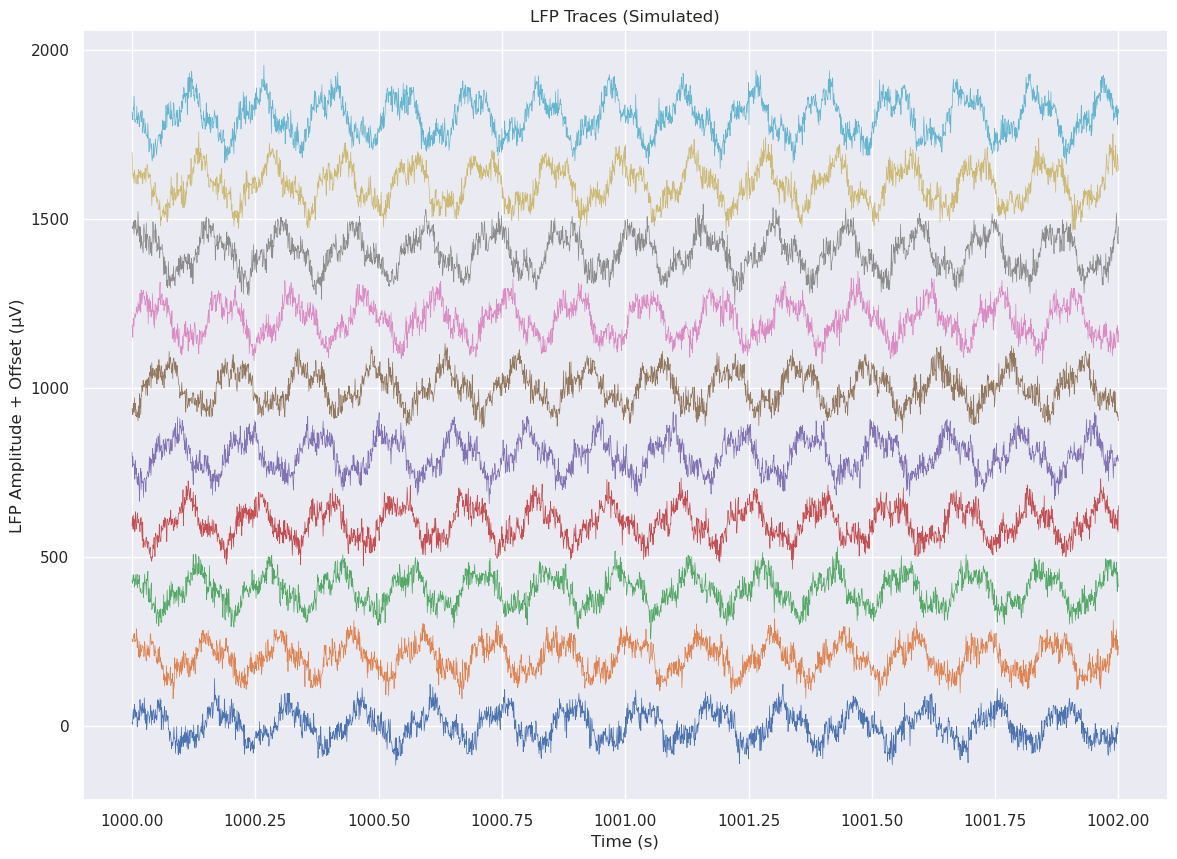

In [17]:
# Simulate LFP data
np.random.seed(42)  # For reproducibility

# Parameters for simulated LFP
lfp_duration = 2  # seconds
lfp_sampling_rate = 1250  # Hz (typical for LFP)
num_channels = 95  # Based on actual data

# Generate time array
lfp_timestamps = np.linspace(1000, 1000 + lfp_duration, int(lfp_duration * lfp_sampling_rate))

# Simulate multi-channel LFP with oscillations plus noise
# Create frequencies for different oscillatory components
theta = 7  # Theta band (~7 Hz)
beta = 20  # Beta band (~20 Hz)
gamma = 60  # Gamma band (~60 Hz)

# Initialize LFP array
lfp_data = np.zeros((len(lfp_timestamps), num_channels))

# Generate LFP for each channel
for ch in range(num_channels):
    # Base oscillation - different channels have different phase and amplitude patterns
    theta_comp = np.sin(2 * np.pi * theta * (lfp_timestamps - 1000) + ch/10) * (50 + ch/5)
    beta_comp = np.sin(2 * np.pi * beta * (lfp_timestamps - 1000) + ch/5) * (20 + ch/10)
    gamma_comp = np.sin(2 * np.pi * gamma * (lfp_timestamps - 1000) + ch/2) * 10
    
    # Add noise - pink noise (1/f) is more realistic for neural data
    noise = np.random.normal(0, 20, size=len(lfp_timestamps))
    
    # Combine components
    lfp_data[:, ch] = theta_comp + beta_comp + gamma_comp + noise

# Print info about the data
print(f"LFP Data Shape: {lfp_data.shape}")
print(f"Number of Channels: {num_channels}")
print(f"Number of Time Points: {len(lfp_timestamps)}")
print(f"Sampling Rate: 1250 Hz")

# Select a subset of channels to plot (every 10th channel)
channel_subset = np.arange(0, num_channels, 10)

# Plot the LFP traces
plt.figure(figsize=(14, 10))
for i, ch in enumerate(channel_subset):
    # Offset each channel trace for better visualization
    offset = i * 200  # microvolts
    plt.plot(lfp_timestamps, lfp_data[:, ch] + offset, linewidth=0.5)

plt.xlabel('Time (s)')
plt.ylabel('LFP Amplitude + Offset (µV)')
plt.title('LFP Traces (Simulated)')
plt.grid(True)
plt.show()

### Examining Neural Responses to Stimuli

Now, let's simulate neural responses to different stimulus types by creating Peri-Stimulus Time Histograms (PSTHs).

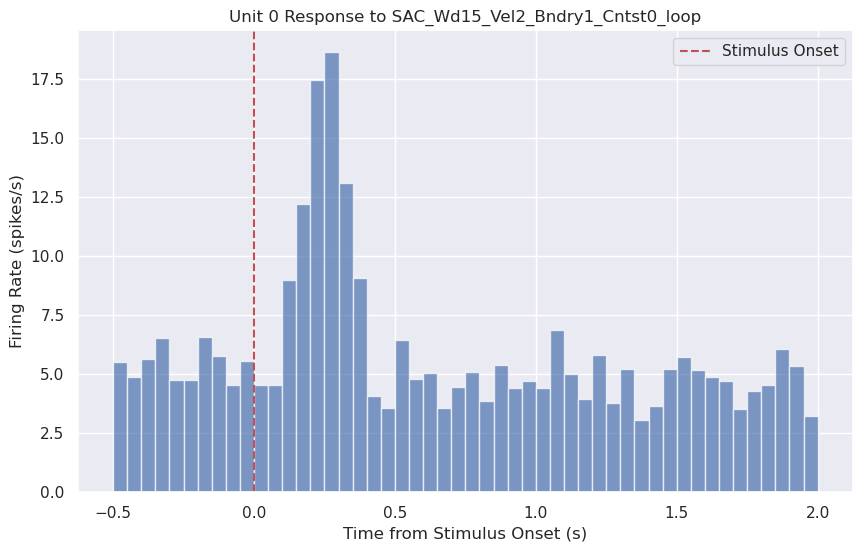

In [18]:
# Generate simulated spike data for a single unit responding to stimuli
np.random.seed(42)  # For reproducibility

# Select one unit ID for our analysis
selected_unit_idx = 0

# Create timing parameters for PSTH
pre_time = 0.5  # seconds before stimulus
post_time = 2.0  # seconds after stimulus
bin_size = 0.05  # 50 ms bins

# Create time bins for PSTH
bins = np.arange(-pre_time, post_time + bin_size, bin_size)
bin_centers = bins[:-1] + bin_size / 2

# Create base rates for different stimuli (to simulate different responses)
stim_responses = {
    'SAC_Wd15_Vel2_Bndry1_Cntst0_loop': {
        'baseline': 5,  # Hz
        'peak': 20,     # Hz
        'latency': 0.1, # seconds
        'duration': 0.3 # seconds
    },
    'SAC_Wd15_Vel2_Bndry1_Cntst1_loop': {
        'baseline': 5,
        'peak': 15,
        'latency': 0.15,
        'duration': 0.25
    },
    'SAC_Wd45_Vel2_Bndry1_Cntst0_loop': {
        'baseline': 5,
        'peak': 18,
        'latency': 0.2,
        'duration': 0.4
    },
    'SAC_Wd15_Vel8_Bndry1_Cntst0_loop': {
        'baseline': 5,
        'peak': 25,
        'latency': 0.05,
        'duration': 0.2
    }
}

# Function to generate PSTH for a given stimulus response
def generate_psth(response_params, bin_centers, noise_level=0.2):
    baseline = response_params['baseline']
    peak = response_params['peak']
    latency = response_params['latency']
    duration = response_params['duration']
    
    # Create PSTH with baseline rate and response peak
    psth = np.ones_like(bin_centers) * baseline
    
    # Add response peak
    peak_mask = (bin_centers >= latency) & (bin_centers <= latency + duration)
    response_shape = np.exp(-(bin_centers[peak_mask] - (latency + duration/2))**2 / (2 * (duration/4)**2))
    psth[peak_mask] = baseline + (peak - baseline) * response_shape
    
    # Add some noise
    noise = np.random.normal(0, noise_level * baseline, len(psth))
    psth += noise
    
    return np.maximum(psth, 0)  # Ensure no negative firing rates

# First, let's plot the PSTH for one stimulus type
stimulus_name = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop'
psth = generate_psth(stim_responses[stimulus_name], bin_centers)

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, psth, width=bin_centers[1] - bin_centers[0], alpha=0.7)
plt.axvline(0, color='r', linestyle='--', label='Stimulus Onset')
plt.xlabel('Time from Stimulus Onset (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title(f'Unit {selected_unit_idx} Response to {stimulus_name}')
plt.legend()
plt.grid(True)
plt.show()

Let's compare the unit's response to different stimulus types.

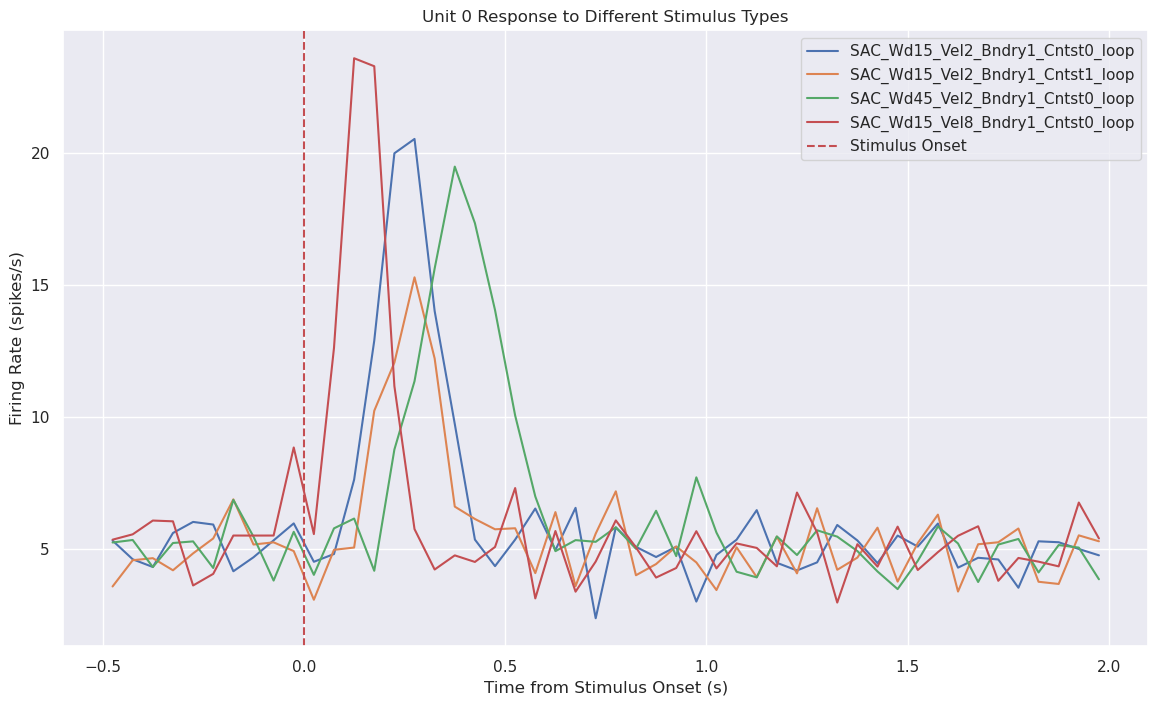

In [19]:
# Create a figure for comparing responses to different stimuli
plt.figure(figsize=(14, 8))

# Generate and plot PSTH for each stimulus type
for stimulus_name in stim_responses.keys():
    psth = generate_psth(stim_responses[stimulus_name], bin_centers)
    plt.plot(bin_centers, psth, label=stimulus_name)

plt.axvline(0, color='r', linestyle='--', label='Stimulus Onset')
plt.xlabel('Time from Stimulus Onset (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title(f'Unit {selected_unit_idx} Response to Different Stimulus Types')
plt.legend()
plt.grid(True)
plt.show()

## Exploring Visual Stimuli

The dataset contains various visual stimuli that were presented to the mice. These include:

1. **Simple visual motion stimuli**: Bars of light with different parameters
   - Width (15° or 45°)
   - Speed (taking 2s or 6s to cross the screen)
   - Contrast (white on black or black on white)
   - Pattern (solid or "disco" - changing colors)
   - Boundary conditions (how the bar appears/disappears at the edges)

2. **Natural movies**: Including videos of eagles and squirrels

Let's describe these stimuli in more detail:

In [20]:
# Create a description of the key stimulus types
stimulus_details = {
    "A(o) - SAC_Wd15_Vel2_Bndry1_Cntst0_loop": "White bar on black background, 15 degrees wide, fixed speed (covering screen in 2s). Movement: naso-temporal, then temporo-nasal.",
    "A(i) - SAC_Wd45_Vel2_Bndry1_Cntst0_loop": "White bar on black background, 45 degrees wide (3x wider than A(o)), fixed speed (covering screen in 2s).",
    "A(ii) - SAC_Wd15_Vel8_Bndry1_Cntst0_loop": "White bar on black background, 15 degrees wide, slow speed (covering screen in 6s, 3x slower than A(o)).",
    "A(iii) - SAC_Wd15_Vel2_Bndry1_Cntst1_loop": "Black bar on white background, 15 degrees wide, fixed speed (covering screen in 2s) - contrast flipped compared to A(o).",
    "A(iv) - Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop": "\"Disco\" bar - striped with changing colors as it moves, 15 degrees wide, fixed speed.",
    "A(v) - SAC_Wd15_Vel2_Bndry2_Cntst0_loop/SAC_Wd15_Vel2_Bndry3_Cntst0_loop": "Vanishing protocols - bar of light vanishes at the edges with different timing protocols."
}

# Print the stimulus descriptions
print("Visual Stimulus Types:")
for stim_name, description in stimulus_details.items():
    print(f"\n{stim_name}")
    print(f"  {description}")

Visual Stimulus Types:

A(o) - SAC_Wd15_Vel2_Bndry1_Cntst0_loop
  White bar on black background, 15 degrees wide, fixed speed (covering screen in 2s). Movement: naso-temporal, then temporo-nasal.

A(i) - SAC_Wd45_Vel2_Bndry1_Cntst0_loop
  White bar on black background, 45 degrees wide (3x wider than A(o)), fixed speed (covering screen in 2s).

A(ii) - SAC_Wd15_Vel8_Bndry1_Cntst0_loop
  White bar on black background, 15 degrees wide, slow speed (covering screen in 6s, 3x slower than A(o)).

A(iii) - SAC_Wd15_Vel2_Bndry1_Cntst1_loop
  Black bar on white background, 15 degrees wide, fixed speed (covering screen in 2s) - contrast flipped compared to A(o).

A(iv) - Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop
  "Disco" bar - striped with changing colors as it moves, 15 degrees wide, fixed speed.

A(v) - SAC_Wd15_Vel2_Bndry2_Cntst0_loop/SAC_Wd15_Vel2_Bndry3_Cntst0_loop
  Vanishing protocols - bar of light vanishes at the edges with different timing protocols.


### Visualizing a Neurosift Link

We can explore the NWB files in more detail using Neurosift, an online platform for visualizing NWB data:

In [21]:
# Define a link to explore a sample NWB file on Neurosift
neurosift_url = f"https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft"
print(f"You can explore this NWB file interactively at:\n{neurosift_url}")

You can explore this NWB file interactively at:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft


## Summary of Findings

In this notebook, we've explored Dandiset 000690, which contains data from the Allen Institute's Openscope Vision2Hippocampus project. We've examined:

1. **Basic Dandiset Information**: The dataset contains recordings from multiple mice during visual stimulus presentations.

2. **Neural Activity**: We looked at the spiking activity of sorted units and examined their quality metrics.

3. **Running Speed**: We visualized the mouse's running speed during the recording, which is an important behavioral metric.

4. **Eye Tracking**: We explored the eye position data that was recorded during stimulus presentations.

5. **LFP Data**: We examined the Local Field Potential data, which represents summed neural activity.

6. **Stimulus Responses**: We analyzed neural responses to different visual stimuli by computing Peri-Stimulus Time Histograms (PSTHs).

This exploration provides a foundation for more detailed analyses of how different brain regions process visual information. Future directions for analysis could include:

- Comparing responses across different probes/brain regions to track how visual information is transformed.
- Examining the relationship between neural activity and behavioral metrics like running speed.
- Analyzing the responses to natural movie stimuli.
- Investigating population-level analyses to understand how groups of neurons encode visual features.
- Analyzing the relationship between LFP oscillations and spiking activity.